# He3 Spectrometer Measurements from Benoit

## General information 

- Date of the measurement: 23 and 24 of April
- Time of the measurements: Unspecified, but likely coded in the folder structure DD-M-YYY HH-MM-SS. Note that one folder has three entries for the second. --> Inconsistent labeling.
- Positions of the H3 spectrometer: Encoded in the folder structure at the end 0, 90, and 180 degree
- For each position there are two measurements, one with a blinding cone and one without.

## Details from Benoit in E-Mail accompanying the data

- Angular position of the spectrometer is manually tuned. High degree of uncertainty. Between with/without blinding cone the spectrometer did not move.
- Blinding cone is thick enough that no direct contribution should be recorded. Closeness between He3 spectrometer and blinding cone is source of scattering contribution.
- Reference neutron flux is recorded with the usual scintillators at north position below the neutron source. In each measurement folder, this is the "temp_output.csv" folder. Can be used for neutron flux normalization. This can be expanded with the LB6411 readings, if the measurement times are accurately known. Measurement timestamp information is missing!
- Measurement data set consists of 1e6 counts --> What does this mean? Total counts?
- Total measurement time is encoded in the filename as D*.D*. The mat file data structure is not explained.
- "interm_chA.mat" file contains some couple of pulses to check their overal integrity. Complete lack of information on this data structure.


## Additional details from Benoit on the data structure

- The pulse height data in files such as "final_maxchA_5598.4825.mat". It contains a unique variable "final_maxchA", each column is a voltage in mV.
- Some random full pulses are recorded in "interm_chA.mat" files. The lines correspond to the time, and each column is a given pulse amplitude through time. Lines in this context mean rows. It is still unclear what "random full pulses" are.
- The "temp_output.csv" contains the reference scintillators counts. I integrated the counts overs 219s and repeated that measurement many times --> each line is the result of 219s integration. In details for each column
        - Col 1 = discard
        - Col 2 = discard
        - Col 3 = total integration time
        - Col 4 = discard
        - Col 5 to 8 = counts from scintillator 1,2,3,4
        - Col 9 to 14 = timestamp = year/month/day/hour/minute/second
    There whole set of data corresponds approximately (manually started/stopped) to the running period of the FNS.
    --> Why are there "discarded" entries in the data? Poor feature labeling.
    
    
## Open questions:

1. What are the exact recording times of each He3 spectrometer measurement (position, cone yes/no). Is this in the foldername? If so, what is up with the foldername that contains three entries for the second. Can you provide some written lab notes for the measurement times?
2. What means "Measurement data set consists of 1e6 counts"? Is this the integrated, total number of counts?
3. Is there some explanation of the file "interm_chA.mat" which file contains some couple of pulses to check their overal integrity. What does this phrase "check their overal integrity" mean?
4. Is the manual of the He3 spectrometer available, or is there some documentation available how this particular system works?
5. What means "discard" entries in the "temp_output.csv" file? Why are they included if they are to be discarded?
6. How is the pulse height dataset arranged? What is the row and column label exactly?

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
fname = '/Users/hkromer/02_PhD/02_Data/05.BenoitHe3Spectr/FNS-spectra/23-Apr-2019 10-44-13 0 deg no BC/temp_output.csv'
df_to = pd.read_csv(fname)
df_to.head()

,0,2.1916e+05,2.1916e+05.1,31.37,7743,11016,8028,8733,2019,4,23,8,52,53.538
0,0,219160.0,219160.0,31.69,7981,10656,7866,8753,2019,4,23,8,56,35.924
1,0,219160.0,219160.0,32.00,7641,10714,7634,8716,2019,4,23,9,0,18.149
2,0,219160.0,219160.0,32.25,7680,10494,7726,8565,2019,4,23,9,4,0.375
3,0,219160.0,219160.0,32.44,7673,10730,7807,8572,2019,4,23,9,7,42.619
4,0,219160.0,219160.0,32.63,7529,10421,7507,8621,2019,4,23,9,11,24.843


In [4]:
fname = '/Users/hkromer/02_PhD/02_Data/05.BenoitHe3Spectr/FNS-spectra/23-Apr-2019 10-44-13 0 deg no BC/final_maxchA_5598.4825.csv'
l1 = np.loadtxt(fname, delimiter=',')

In [5]:
len(l1)

1000000

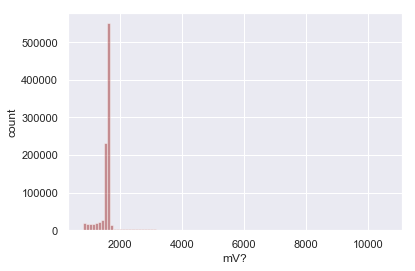

In [19]:
bins = 100
sns.distplot(l1,kde=False, bins=bins, color="darkred")
# plt.ylim(0,50000)
plt.xlabel('mV?')
plt.ylabel('count')
plt.show()

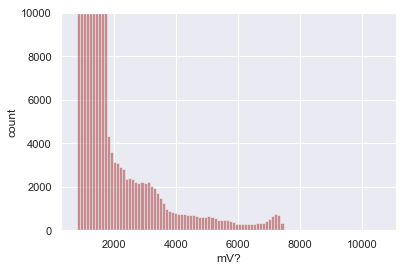

In [18]:
bins = 100
sns.distplot(l1,kde=False, bins=bins, color="darkred")
plt.ylim(0,10000)
plt.xlabel('mV?')
plt.ylabel('count')
plt.show()

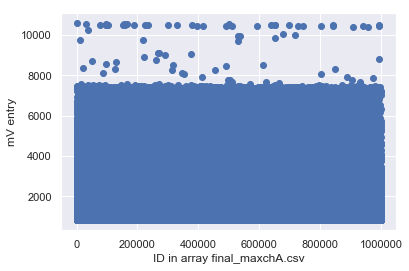

In [20]:
x = np.arange(0, len(l1), 1)
plt.scatter(x, l1)
plt.xlabel('ID in array final_maxchA.csv')
plt.ylabel('mV entry')
plt.show()

In [21]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


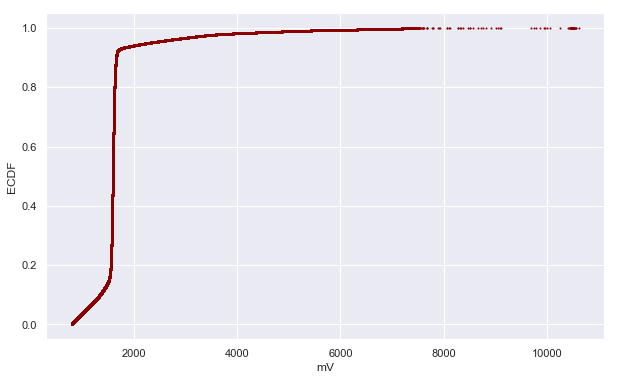

In [28]:
x,y = ecdf(l1)
plt.figure(figsize=(10,6))
# Generate plot
_ = plt.plot(x, y, marker='.', linestyle='none', markersize=2, color='darkred')

# Label the axes
_ = plt.xlabel('mV')
_ = plt.ylabel('ECDF')
# plt.grid()

# Display the plot
plt.show()